In [ ]:
import random
import matplotlib.pyplot as plt

COOPERATE = 0
DEFECT = 1

class Strategy:
    def move(self, history):
        pass

class TitForTat(Strategy):
    def move(self, history):
        if not history:
            return COOPERATE
        return history[-1][1]

class RandomStrategy(Strategy):
    def move(self, history):
        return random.choice([COOPERATE, DEFECT])

class Friedman(Strategy):
    def __init__(self):
        self.defected = False

    def move(self, history):
        if any(move[1] == DEFECT for move in history):
            self.defected = True
        return DEFECT if self.defected else COOPERATE

class Joss(Strategy):
    def __init__(self, prob_defect=0.1):
        self.prob_defect = prob_defect

    def move(self, history):
        if random.random() < self.prob_defect:
            return DEFECT
        if not history:
            return COOPERATE
        return history[-1][1]

class Harrington(Strategy):
    def move(self, history):
        if len(history) >= 2 and history[-1][1] == DEFECT and history[-2][1] == DEFECT:
            return DEFECT
        return COOPERATE

class AlwaysCooperate(Strategy):
    def move(self, history):
        return COOPERATE

class AlwaysDefect(Strategy):
    def move(self, history):
        return DEFECT

class GrimTrigger(Strategy):
    def __init__(self):
        self.defected = False

    def move(self, history):
        if any(move[1] == DEFECT for move in history):
            self.defected = True
        return DEFECT if self.defected else COOPERATE

In [ ]:
class PrisonersDilemmaGame:
    def __init__(self, strategy1, strategy2, n):
        self.strategy1 = strategy1
        self.strategy2 = strategy2
        self.n = n
        self.history = []
        self.payoff = {COOPERATE: {COOPERATE: (3, 3), DEFECT: (0, 5)},
                       DEFECT: {COOPERATE: (5, 0), DEFECT: (1, 1)}}
        self.score1 = 0
        self.score2 = 0

    def play_round(self):
        move1 = self.strategy1.move(self.history)
        move2 = self.strategy2.move(self.history)
        self.history.append((move1, move2))
        payoff1, payoff2 = self.payoff[move1][move2]
        self.score1 += payoff1
        self.score2 += payoff2

    def play_game(self):
        for _ in range(self.n):
            self.play_round()

    def get_scores(self):
        return self.score1, self.score2


In [11]:
def run_simulation(strategy1_class, strategy2_class, n=100):
    strategy1 = strategy1_class()
    strategy2 = strategy2_class()
    game = PrisonersDilemmaGame(strategy1, strategy2, n)
    scores1 = []
    scores2 = []

    for _ in range(n):
        game.play_round()
        score1, score2 = game.get_scores()
        scores1.append(score1)
        scores2.append(score2)

    plt.plot(scores1, label=f'Strategy 1: {strategy1_class.__name__}')
    plt.plot(scores2, label=f'Strategy 2: {strategy2_class.__name__}')
    plt.xlabel('Rounds')
    plt.ylabel('Total Payoff')
    plt.legend()
    plt.show()


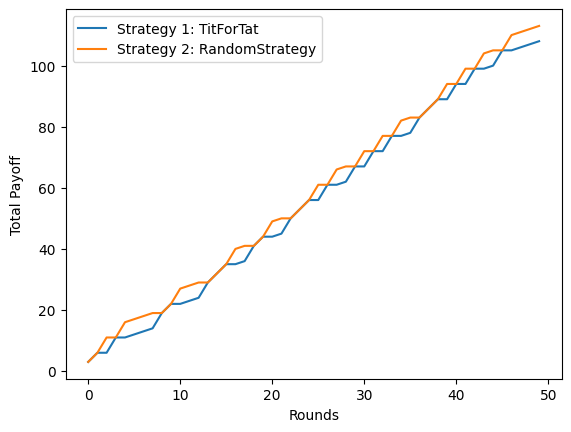

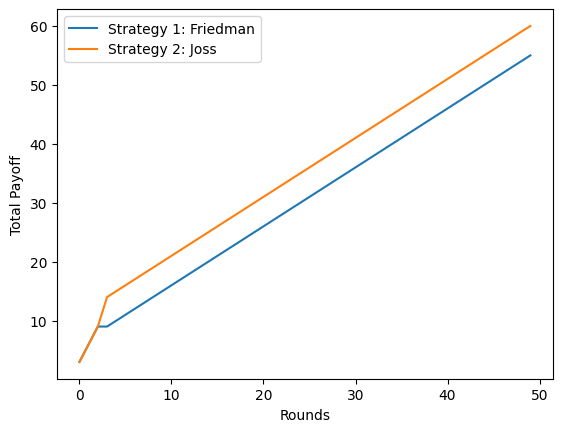

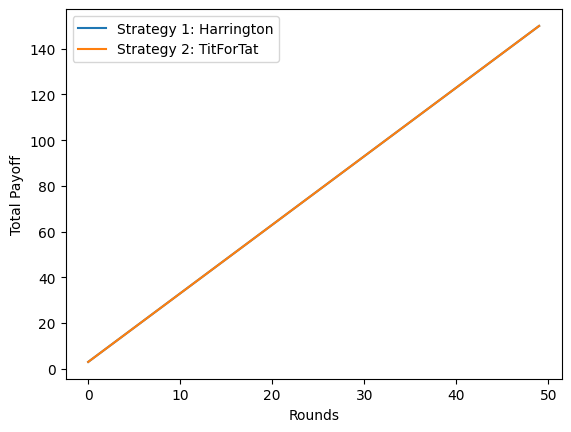

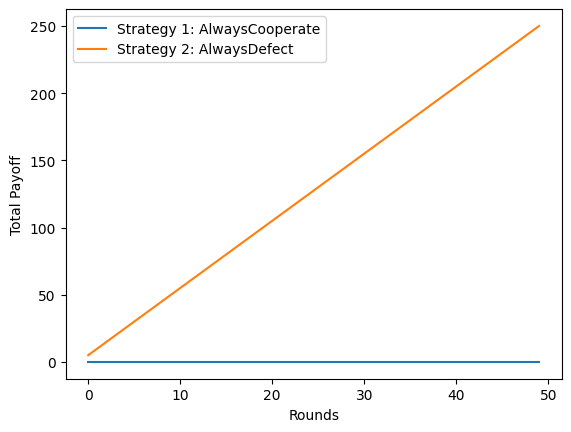

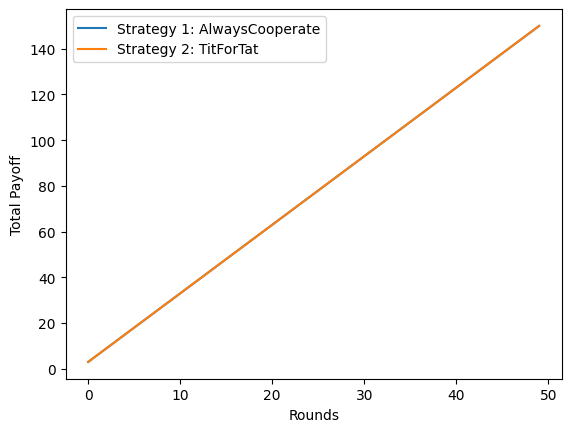

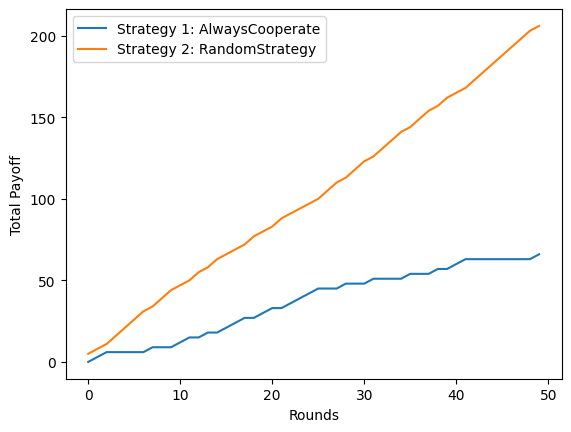

In [13]:
run_simulation(TitForTat, RandomStrategy, n=50)
run_simulation(Friedman, Joss, n=50)
run_simulation(Harrington, TitForTat, n=50)
run_simulation(AlwaysCooperate, AlwaysDefect, n=50)
run_simulation(AlwaysCooperate, TitForTat, n=50)
run_simulation(AlwaysCooperate, RandomStrategy, n = 50)


In [ ]:
import matplotlib.pyplot as plt

class Tournament:
    def __init__(self, participants, n_rounds=200):
        self.participants = participants
        self.n_rounds = n_rounds
        self.K = len(self.participants)

        self.resarr = {participant.__class__.__name__: [0] * (self.K * self.n_rounds) for participant in participants}

    def run_tournament(self):
        for i, strategy1 in enumerate(self.participants):
            for j, strategy2 in enumerate(self.participants):
                game = PrisonersDilemmaGame(strategy1, strategy2, self.n_rounds)
                game.play_game()
                for k in range(self.n_rounds):

                    current_index = self.n_rounds * j + k

                    if current_index == 0:
                        self.resarr[strategy1.__class__.__name__][current_index] = game.payoff[game.history[k][0]][game.history[k][1]][0]
                    else:
                        self.resarr[strategy1.__class__.__name__][current_index] = self.resarr[strategy1.__class__.__name__][current_index - 1] + game.payoff[game.history[k][0]][game.history[k][1]][0]

    def plot_graph(self):
        plt.figure(figsize=(10, 6))
        for strategy, payoffs in self.resarr.items():
            plt.plot(range(1, self.K * self.n_rounds + 1), payoffs, label=strategy)
        plt.xlabel("Iteration")
        plt.ylabel("Cumulative Payoffs")
        plt.title("Cumulative Payoffs for Each Strategy Over Time")
        plt.legend()
        plt.tight_layout()
        plt.show()

    def plot_results(self):

        strategies = list(self.resarr.keys())
        total_payoffs = [payoff[-1] for payoff in self.resarr.values()]
        plt.bar(strategies, total_payoffs)
        plt.xlabel('Strategies')
        plt.ylabel('Total Payoff')
        plt.title(f'Total Payoff of Each Strategy over {self.K * self.n_rounds} Rounds')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

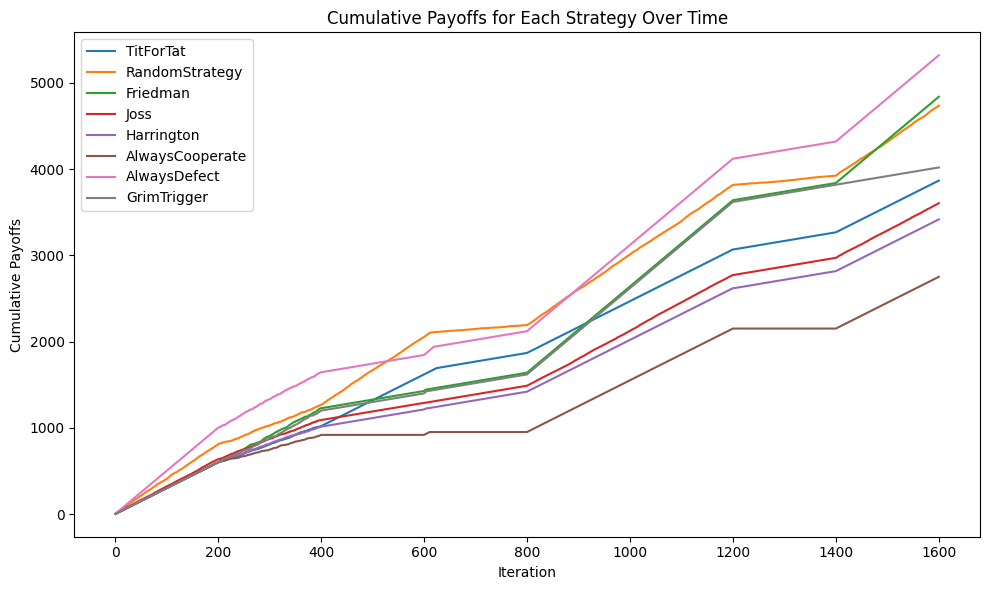

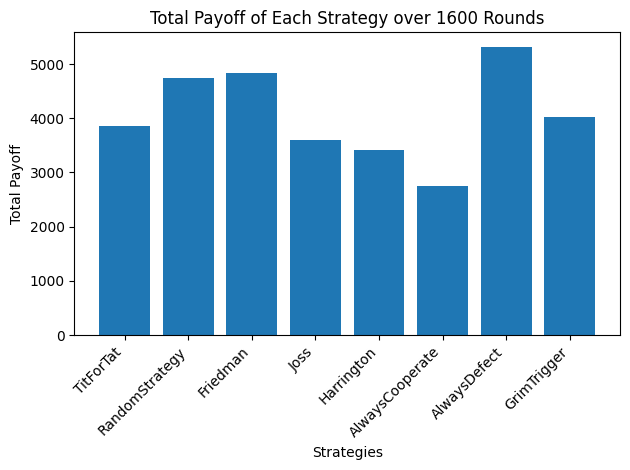

In [ ]:
participants = [
    TitForTat(), RandomStrategy(), Friedman(), Joss(),
    Harrington(), AlwaysCooperate(), AlwaysDefect(), GrimTrigger()
]

tournament = Tournament(participants, n_rounds=200)
tournament.run_tournament()

tournament.plot_graph()

tournament.plot_results()